In [22]:
import pandas as pd
from sklearn.cluster import KMeans

In [23]:
# Read in the CSV file and create the Pandas DataFrame
df_shopping = pd.read_csv("https://static.bc-edx.com/mbc/ai/m2/datasets/shopping-data.csv")

# Review the DataFrame
df_shopping.head()

,CustomerID,Card Type,Age,Annual Income,Spending Score
0,1,Credit,19,15000,39
1,2,Credit,21,15000,81
2,3,Debit,20,16000,6
3,4,Debit,23,16000,77
4,5,Debit,31,17000,40


In [24]:
##################
#   Encoding     #
##################

# Build the encodeCard helper function
# Credit card purchases should encode to 1
# Debit card purchases should encode to 0
def encodeCard(card_type):
#     """
#     This function encodes a card type by setting credit card purchases to 1 and debit cards to 0.
#     """
  if card_type.lower() == "credit":
    return 1
#   i.e. debit card purchase.
  else:
    return 0

In [25]:
#################
#   Encoding    #
#################
df_shopping["Card Type"] = df_shopping["Card Type"].apply(encodeCard)

In [26]:
##################
#   Scaling      #
##################  
# Scale the Annual Income column 
df_shopping['Annual Income'] = df_shopping['Annual Income'] / 1000

In [27]:
##################
#   Training     #
##################
# build models and fit
model_k4 = KMeans(n_clusters=4, n_init='auto')
model_k4.fit(df_shopping)
model_k5 = KMeans(n_clusters=5, n_init='auto')
model_k5.fit(df_shopping)

# Predict two sets of clusters.
customer_segments_k4 = model_k4.predict(df_shopping)
customer_segments_k5 = model_k5.predict(df_shopping)

# Add those clusters back in to original data.
df_shopping_predictions = df_shopping.copy()
df_shopping_predictions["Customer Segment (k=4)"] = customer_segments_k4
df_shopping_predictions["Customer Segment (k=5)"] = customer_segments_k5

<Axes: title={'center': 'Scatter Plot by Stock Segment - k=5'}, xlabel='Annual Income', ylabel='Spending Score'>

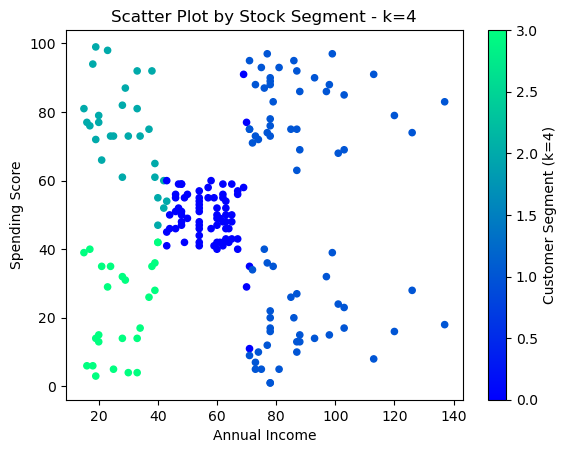

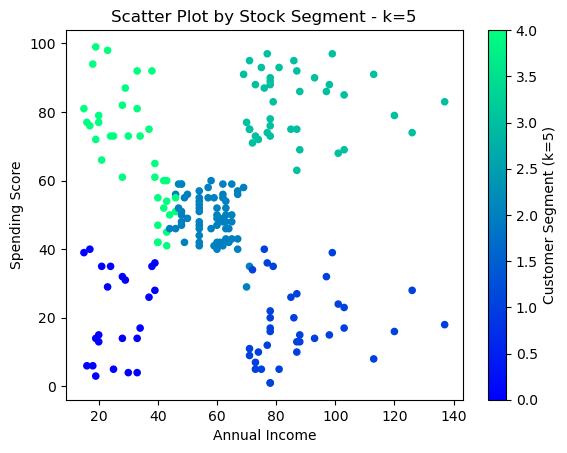

In [28]:
##################
#   Plotting     #
##################

# Plot both clusters of customer segments from spending prediction to annual income.
df_shopping_predictions.plot.scatter(
  x="Annual Income", 
  y="Spending Score", 
  c="Customer Segment (k=4)",
  title = "Scatter Plot by Stock Segment - k=4",
  colormap='winter'
)
df_shopping_predictions.plot.scatter(
  x="Annual Income", 
  y="Spending Score", 
  c="Customer Segment (k=5)",
  title = "Scatter Plot by Stock Segment - k=5",
  colormap='winter'
)